# Animal Bites - Louisville, Kentucky

https://www.kaggle.com/rtatman/animal-bites/data

Context:
In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

Content:
Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

bite_date: The date the bite occurred
SpeciesIDDesc: The species of animal that did the biting
BreedIDDesc: Breed (if known)
GenderIDDesc: Gender (of the animal)
color: color of the animal
vaccination_yrs: how many years had passed since the last vaccination
vaccination_date: the date of the last vaccination
victim_zip: the zipcode of the victim
AdvIssuedYNDesc: whether advice was issued
WhereBittenIDDesc: Where on the body the victim was bitten
quarantine_date: whether the animal was quarantined
DispositionIDDesc: whether the animal was released from quarantine
headsentdate: the date the animal’s head was sent to the lab
release_date: the date the animal was released
ResultsIDDesc: results from lab tests (for rabies)
Acknowledgements:
Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. This data is in the public domain.

Inspiration:
Which animals are most likely to bite humans? 

Are some dog breeds more likely to bite?

What factors are most strongly associated with a positive rabies ID?

In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
path = 'Health_AnimalBites.csv'
df = pd.read_csv(path)
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [19]:
df.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

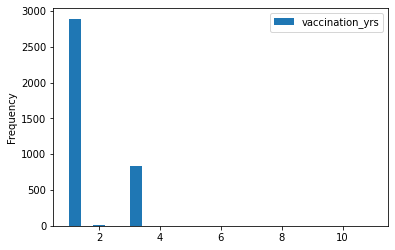

In [11]:
df.plot(kind='hist',bins =25)

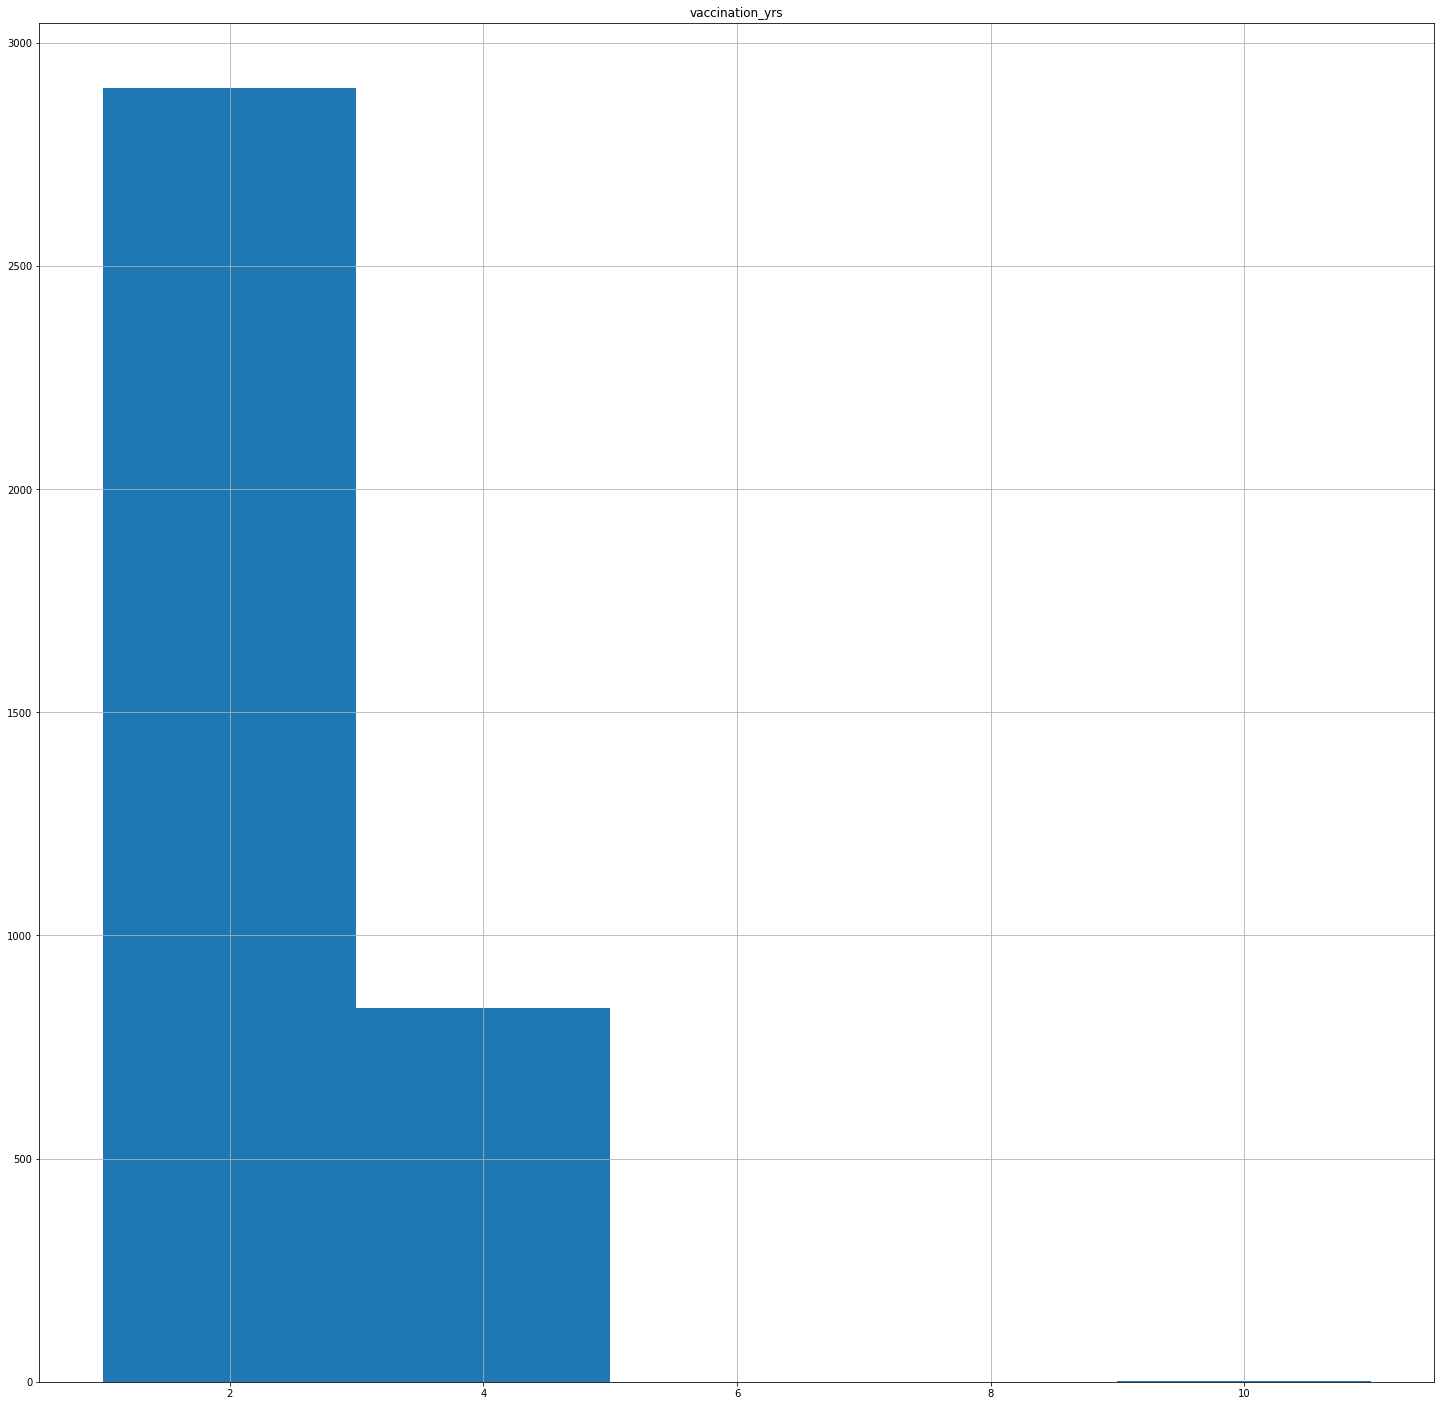

In [17]:
hist = df.hist(bins=5,figsize =(25,25))

In [21]:
# There are 9 animals name 
species = df.SpeciesIDDesc
species = species.dropna() #drop nan values in species feature
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


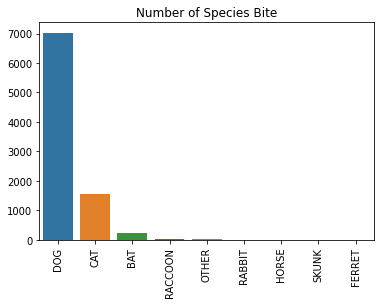

In [23]:
animal_list = []

for  i in speciesOfAnimal:
    animal_list.append(len(species[species==i]))
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=90)
print(animal_list)